# 02 Hungarian Chickenpox Data Wrangling
***

## 02.1 Contents<a id='02.1_Contents'></a>
* [02 Hungarian Chickenpox Data Wrangling](#02_Hungarian_Chickenpox_Data_Wrangling)
  * [02.1 Contents](#02.1_Contents)
  * [02.2 Introduction](#02.2_Introduction)  
  * [02.3 Data Sources](#02.3_Data_Sources)  
  * [02.4 Import Python Modules](#02.4_Import_Python_Modules) 
  * [02.5 Import Data](#02.5_Import_Data)
       * [02.5.1 Import Chickenpox Cases by County](#02.5.1_Import_Chickenpox_Cases_by_County)
           * [02.5.1.1 Import Raw Data](#02.5.1.1_Import_Raw_Data)
           * [02.5.1.1 Import Raw Data](#02.5.1.1_Import_Raw_Data)         
           * [02.5.1.2 Review Raw Data](#02.5.1.2_Review_Raw_Data)
               * [02.5.1.2.1 Example](#02.5.1.2.1_Example)
               * [02.5.1.2.2 Structure](#02.5.1.2.2_Structure)  
               * [02.5.1.2.3 Quick Statistics](#02.5.1.2.3_Quick_Statistics)
               * [02.5.1.2.4 Cumulative Case Counts by County](#02.5.1.2.4_Cumulative_Case_Counts_by_County) 
           * [02.5.1.3 Reshape Raw Data](#02.5.1.2_Reshape_Raw_Data)
               * [02.5.1.3.1 Example](#02.5.1.3.1_Example)
               * [02.5.1.3.2 Structure](#02.5.1.3.2_Structure)             
       * [02.5.2 Import Adjacent County to County](#02.5.1_Import_Adjacent_County_to_County)       
           * [02.5.2.1 Import Raw Data](#02.5.2.1_Import_Raw_Data)
           * [02.5.2.2 Review Raw Data](#02.5.2.2_Review_Raw_Data)
               * [02.5.2.2.1 Example](#02.5.2.2.1_Example)
               * [02.5.2.2.2 Structure](#02.5.2.2.2_Structure)            
           * [02.5.2.3 Reshape Raw Data](#02.5.2.2_Reshape_Raw_Data)
       * [02.5.3 Import Statistical Data by County](#02.5.3_Import_Statistical_Data_by_County)
           * [02.5.3.1 Import Raw Data](#02.5.3.1_Import_Raw_Data)
           * [02.5.3.2 Review Raw Data](#02.5.3.2_Review_Raw_Data) 
               * [02.5.3.2.1 Example](#02.5.3.2.1_Example)
               * [02.5.3.2.2 Structure](#02.5.3.2.2_Structure)
               * [02.5.3.2.3 Quick Statistics](#02.5.3.2.3_Quick_Statistics)
           * [02.5.3.3 Reshape Raw Data](#02.5.3.3_Reshape_Raw_Data)
               * [02.5.3.3.1 Example](#02.5.3.3.1_Example)
               * [02.5.3.3.2 Structure](#02.5.1.3.2_Structure)
               * [02.5.3.3.3 Feature Distributions](#02.5.1.3.3_Feature_Distributions)
* [02.6 Merge Files](#02.6_Merge_Files)
   * [02.6.1 Weekly Cases by County Merged with Statistics](#02.6.1_Weekly_Cases_by_County_Merged_with_Statistics)
       * [02.6.1.1 Example](#02.6.1.1_Example)
       * [02.6.1.2 Structure](#02.6.1.2_Structure)
   * [02.6.2 Annual Cases by County Merged with Statistics](#02.6.2_Annual_Cases_by_County_Merged_with_Statistics)
       * [02.6.2.1 Example](#02.6.2.1_Example)
       * [02.6.2.2 Structure](#02.6.2.2_Structure)
   * [02.6.3 Adjacent Counties Merged with Data](#02.6.3_Adjacent_Counties_Merged_with_Data)
       * [02.6.3.1 Example](#02.6.3.1_Example)
       * [02.6.3.2 Structure](#02.6.3.2_Structure)
* [02.7 Save Files](#02.7_Save_Files)
* [02.8 Summary](#02.8_Summary)

## 02.2 Introduction<a id='02.2_Introduction'></a>

The purpose for this project is to asertain if an outbreak of chicken pox will occur in a georaphically decernable manner across the 20 counties of Hungary provided demographic data obtained from the Hungarian Central Statistical Office for each county.

## 02.3 Data Sources<a id='02.3_Data_Sources'></a>


Chickenpox Cases in Hungary: a Benchmark Dataset for Spatiotemporal Signal Processing with Graph Neural Networks
Benedek Rozemberczki, Paul Scherer, Oliver Kiss, Rik Sarkar, Tamas Ferenci
https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases

Hungarian Central Statistical Office
Dissemination Database Statistics by Subject:Population and Social Statistics
https://statinfo.ksh.hu/Statinfo/themeSelector.jsp?&lang=en


## 02.4 Import Python Modules<a id='02.4_Import_Python_Modules'></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
#from library.sb_utils import save_file not in anaconda
#import pandas_profiling  removed due to memory consumption
#from pandas_profiling.utils.cache import cache_file   removed due to memory consumption

## 02.5 Import Data<a id='02.5_Import_Data'></a>

### 02.5.1 Import Chickenpox Cases by County<a id='02.5.1_Import_Chickenpox_Cases_by_County'></a>

The file is a ten year table of chickenpox cases by week and by county for the period 2005 -2014. 20 counties by 522 weekly counts.  10,440 data points in total.

#### 02.5.1.1 Import Raw Data<a id='02.5.1.1_Import_Raw_Data'></a>

In [2]:
# Assign filename: file
#project location on local
Project_Local ='C:/Users/Greki/Capstone_Two/'
File_Location='data/raw/hungary_chickenpox.csv'
file =Project_Local+File_Location
# Load chickenpox data
df1 = pd.read_csv(file)


#### 02.5.1.2 Review Raw Data<a id='02.5.1.2_Review_Raw_Data'></a>

##### 02.5.1.2.1 Example<a id='02.5.1.2.1_Example'></a>

In [3]:
print(df1.head())

         Date  BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  GYOR  \
0    3/1/2005       168       79    30    173     169        42    136   120   
1   10/1/2005       157       60    30     92     200        53     51    70   
2  17/01/2005        96       44    31     86      93        30     93    84   
3  24/01/2005       163       49    43    126      46        39     52   114   
4  31/01/2005       122       78    53     87     103        34     95   131   

   HAJDU  ...  JASZ  KOMAROM  NOGRAD  PEST  SOMOGY  SZABOLCS  TOLNA  VAS  \
0    162  ...   130       57       2   178      66        64     11   29   
1     84  ...    80       50      29   141      48        29     58   53   
2    191  ...    64       46       4   157      33        33     24   18   
3    107  ...    63       54      14   107      66        50     25   21   
4    172  ...    61       49      11   124      63        56      7   47   

   VESZPREM  ZALA  
0        87    68  
1        68    26  
2 

##### 02.5.1.2.2 Structure<a id='02.5.1.2.2_Structure'></a>

In [4]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      522 non-null    object
 1   BUDAPEST  522 non-null    int64 
 2   BARANYA   522 non-null    int64 
 3   BACS      522 non-null    int64 
 4   BEKES     522 non-null    int64 
 5   BORSOD    522 non-null    int64 
 6   CSONGRAD  522 non-null    int64 
 7   FEJER     522 non-null    int64 
 8   GYOR      522 non-null    int64 
 9   HAJDU     522 non-null    int64 
 10  HEVES     522 non-null    int64 
 11  JASZ      522 non-null    int64 
 12  KOMAROM   522 non-null    int64 
 13  NOGRAD    522 non-null    int64 
 14  PEST      522 non-null    int64 
 15  SOMOGY    522 non-null    int64 
 16  SZABOLCS  522 non-null    int64 
 17  TOLNA     522 non-null    int64 
 18  VAS       522 non-null    int64 
 19  VESZPREM  522 non-null    int64 
 20  ZALA      522 non-null    int64 
dtypes: int64(20), ob

In [5]:
#datatype for Date column to date time
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y')
#add Yearpart column for joining to County level statistical data
df1['Yearpart'] = df1['Date'].dt.year.apply(str)
df1.insert(loc=1, column='Year',value=df1['Yearpart'] )

##### 02.5.1.2.3 Quick Statisicts<a id='02.5.1.2.3_Quick_Statistics'></a>

In [6]:
print(df1.describe())

         BUDAPEST     BARANYA        BACS       BEKES      BORSOD    CSONGRAD  \
count  522.000000  522.000000  522.000000  522.000000  522.000000  522.000000   
mean   101.245211   34.204981   37.166667   28.911877   57.082375   31.488506   
std     76.354872   32.567222   36.843095   37.618092   50.725437   33.790208   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     34.250000    8.000000    8.000000    4.000000   14.250000    6.000000   
50%     93.000000   25.000000   29.500000   14.000000   46.500000   20.500000   
75%    149.000000   51.000000   53.000000   38.750000   83.750000   47.000000   
max    479.000000  194.000000  274.000000  271.000000  355.000000  199.000000   

            FEJER        GYOR       HAJDU       HEVES        JASZ     KOMAROM  \
count  522.000000  522.000000  522.000000  522.000000  522.000000  522.000000   
mean    33.272031   41.436782   47.097701   29.691571   40.869732   25.643678   
std     31.397989   36.0142

##### 02.5.1.2.4 Cumulative Case Counts by County<a id='02.5.1.2.4_Cumulative_Case_Counts_by_County'></a>

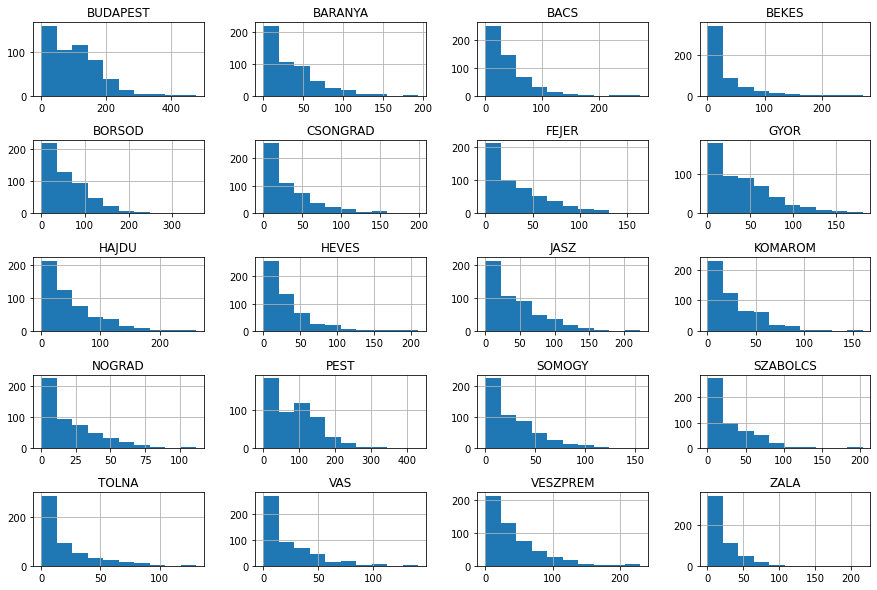

In [7]:
df1.loc[:,'BUDAPEST':'ZALA'].hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.60)


#### 02.5.1.3 Reshape Raw Data<a id='02.5.1.2_Reshape_Raw_Data'></a>

In [8]:
counties =['BUDAPEST', 'BARANYA', 'BACS', 'BEKES', 'BORSOD', 'CSONGRAD', 'FEJER', 'GYOR', 'HEVES','HAJDU','JASZ','KOMAROM','NOGRAD','PEST','SOMOGY', 'SZABOLCS', 'TOLNA', 'VAS','VESZPREM','ZALA']
df2=pd.melt(df1,id_vars=['Date', 'Year'], value_vars=counties, var_name='County', value_name='Cases')

##### 02.5.1.3.1 Example<a id='02.5.1.3.1_Example'></a>

In [9]:
print(df2.head())

        Date  Year    County  Cases
0 2005-01-03  2005  BUDAPEST    168
1 2005-01-10  2005  BUDAPEST    157
2 2005-01-17  2005  BUDAPEST     96
3 2005-01-24  2005  BUDAPEST    163
4 2005-01-31  2005  BUDAPEST    122


##### 02.5.1.3.2 Structure<a id='02.5.1.3.2_Structure'></a>

In [10]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10440 entries, 0 to 10439
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10440 non-null  datetime64[ns]
 1   Year    10440 non-null  object        
 2   County  10440 non-null  object        
 3   Cases   10440 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 326.4+ KB
None


### 02.5.2 Import Adjacent County to County<a id='02.5.2_Import_Adjacent_County_to_County'></a>

This file defines the geospatial relationships between the counties. Field "name_1" identifies a county. Field "name_2" identifies the adjacent coounties for "name_1".  Field "id_1" is a numerical representation for "name_1", and field  "id_2" is a numerical representation for "name_2".

#### 02.5.2.1 Import Raw Data<a id='02.5.2.1_Import_Raw_Data'></a>

In [11]:
# Assign filename: file
File_Location='data/raw/hungary_county_edges.csv'
file =Project_Local+File_Location
# Load county geographical position data 
df3 = pd.read_csv(file)

#### 02.5.2.2 Review Raw Data<a id='02.5.2.2_Review_Raw_Data'></a>

##### 02.5.2.2.1 Example<a id='02.5.2.2.1_Example'></a>

In [12]:
print(df3.head(20))

     name_1    name_2  id_1  id_2
0      BACS      JASZ     0    10
1      BACS      BACS     0     0
2      BACS   BARANYA     0     1
3      BACS  CSONGRAD     0     5
4      BACS      PEST     0    13
5      BACS     FEJER     0     6
6      BACS     TOLNA     0    16
7   BARANYA   BARANYA     1     1
8   BARANYA     TOLNA     1    16
9   BARANYA    SOMOGY     1    14
10  BARANYA      BACS     1     0
11    BEKES     HAJDU     2     8
12    BEKES     BEKES     2     2
13    BEKES      JASZ     2    10
14    BEKES  CSONGRAD     2     5
15   BORSOD     HEVES     3     9
16   BORSOD  SZABOLCS     3    15
17   BORSOD     HAJDU     3     8
18   BORSOD    BORSOD     3     3
19   BORSOD    NOGRAD     3    12


##### 02.5.2.2.2 Structure<a id='02.5.2.2.2_Structure'></a>

In [13]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name_1  102 non-null    object
 1   name_2  102 non-null    object
 2   id_1    102 non-null    int64 
 3   id_2    102 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.3+ KB
None


#### 02.5.2.3 Reshape Raw Data<a id='02.5.2.3_Reshape_Raw_Data'></a>

In [14]:
#Create adjacent county column
df3['name_adjacent']= df3['name_2']+'_adjacent'

#Columns data types changed to string.  Used for referential purposes not quanitative
df3['id_1'] = df3['id_1'].astype(str)
df3['id_2'] = df3['id_2'].astype(str)
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name_1         102 non-null    object
 1   name_2         102 non-null    object
 2   id_1           102 non-null    object
 3   id_2           102 non-null    object
 4   name_adjacent  102 non-null    object
dtypes: object(5)
memory usage: 4.1+ KB
None


In [15]:


#set all values to 1 for contiguous counties in df3['id_1']
counter_df3 =len(df3['name_2'])
counter=0

while counter < counter_df3:
    if df3['name_1'][counter]!= df3['name_2'][counter]:
        df3['id_1'][counter]='1'

    else: 
        df3['id_1'][counter]='0'

    counter=counter+1

In [16]:
#assess new structure
print(df3.info())
print(df3.head())
#delete unrequired columnsdf3a=df3.drop(columns=['name_2','id_2'])
df3a=df3.drop(columns=['name_2','id_2'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name_1         102 non-null    object
 1   name_2         102 non-null    object
 2   id_1           102 non-null    object
 3   id_2           102 non-null    object
 4   name_adjacent  102 non-null    object
dtypes: object(5)
memory usage: 4.1+ KB
None
  name_1    name_2 id_1 id_2      name_adjacent
0   BACS      JASZ    1   10      JASZ_adjacent
1   BACS      BACS    0    0      BACS_adjacent
2   BACS   BARANYA    1    1   BARANYA_adjacent
3   BACS  CSONGRAD    1    5  CSONGRAD_adjacent
4   BACS      PEST    1   13      PEST_adjacent


In [17]:
#Create new dataframe of counties to adjacent counties
df4=df3a.pivot(index='name_1', columns='name_adjacent', values='id_1')
# fill the non adjacent county values with 0
df4 = df4.fillna(0)
print(df4.info())
print(df4.head(7))

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, BACS to ZALA
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BACS_adjacent      20 non-null     object
 1   BARANYA_adjacent   20 non-null     object
 2   BEKES_adjacent     20 non-null     object
 3   BORSOD_adjacent    20 non-null     object
 4   BUDAPEST_adjacent  20 non-null     object
 5   CSONGRAD_adjacent  20 non-null     object
 6   FEJER_adjacent     20 non-null     object
 7   GYOR_adjacent      20 non-null     object
 8   HAJDU_adjacent     20 non-null     object
 9   HEVES_adjacent     20 non-null     object
 10  JASZ_adjacent      20 non-null     object
 11  KOMAROM_adjacent   20 non-null     object
 12  NOGRAD_adjacent    20 non-null     object
 13  PEST_adjacent      20 non-null     object
 14  SOMOGY_adjacent    20 non-null     object
 15  SZABOLCS_adjacent  20 non-null     object
 16  TOLNA_adjacent     20 non-null     object
 17 

### 02.5.3 Import Statistical Data by County<a id='02.5.3_Import_Statistical_Data_by_County'></a>

Data retrieved from Hungarian Central Statistical Office website.  Data is recorded by county on an annual basis. 
Definitions of columns:

<p>Year: Year
<p>County: County
<p>Area_km: KM^2
<p>Perm_pop: Permanent population (Citizens)
<p>Perm_pop0-2: Permanent population (Citizens) between 0-2 years old
<p>Perm_pop3-5: Permanent population (Citizens) between 3-4 years old
<p>Perm_pop6-13: Permanent population (Citizens) between 6-13 years old
<p>Perm_pop14: Permanent population (Citizens) 14 years old
<p>Live-births: Live births during year
<p>Infant_deaths: Infant deaths during year
<p>Internal_immigration: Hungarian citizens moving into county
<p>Internal_emmigration: Hungarian citizens leaving county
<p>Dwellings: Number of residence
<p>Street_taps: Number of potable water system connections delivered at street level
<p>HH_water_net: Number of households connected to potable water network
<p>HH_water_net_CY: Number of households connected during year to potable water network
<p>HH_sewer_net: Number of households connected to sewer network 
<p>HH_electric_net: Number of households connected to electric grid
<p>HH_gas_net:  Number of households connected to natual gas network
<p>HH_dist_heat_net: Number of households connected to heating network 
<p>HH_hot_water_net: Number of households connected to hot water network
<p>HH_trash_serv:  Number of households with trash service
<p>Num_general_pract: Number of general practicioners
<p>Num_pediatrican: Number of pediatricians
<p>GP_Nurses: number of general nurses
<p>Hospital_Beds: Number of hospital beds
<p>Gyno_ped_nurses: Number of gynological and pediatric nurses
<p>Pharmacies: Number of pharmacies
<p>Branch_pharmacies: Number of branch pharmacies
<p>Job_seekers: number who were looking for work in a year

#### 02.5.3.1 Import Raw Data<a id='02.5.3.1_Import_Raw_Data'></a>

In [18]:
# Assign spreadsheet filename: file
File_Location="data/raw/Annual_statistical_data.xlsx"
census_file =Project_Local+File_Location
xls= pd.ExcelFile(census_file)
# Print sheet names
sheets=(xls.sheet_names)


# Load sheet into a DataFrame
HCD_1 = xls.parse(sheets[0],skiprows= 6,
                  usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29],
                  names=['Year', 'County', 'Area_km','Perm_pop','Perm_pop0-2','Perm_pop3-5','Perm_pop6-13','Perm_pop14',
                        'Live-births', 'Infant_deaths','Internal_immigration','Internal_emmigration',
                         'Dwellings','Street_taps','HH_water_net', 'HH_water_net_CY', 'HH_sewer_net',
                         'HH_electric_net', 'HH_gas_net', 'HH_dist_heat_net','HH_hot_water_net','HH_trash_serv',
                         'Num_general_pract','Num_pediatrican','GP_Nurses','Hospital_Beds','Gyno_ped_nurses','Pharmacies',
                        'Branch_pharmacies','Job_seekers'])
#replace the NaN in HCD_1['Year'] with the single year value per year block
HCD_1['Year']= HCD_1['Year'].fillna(method='ffill').str.replace('. year','', regex= True)#Received warning message about regex default setting changing in newer version 

# Drop empty rows from import
HCD_1= HCD_1.drop(HCD_1.index[[200,201]], axis=0)

C:\Users\Greki\SP\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


#### 02.5.3.2 Review Raw Data<a id='02.5.3.2_Review_Raw_Data'></a>

#### 02.5.3.2.1 Example<a id='02.5.2.2.1_Example'></a>

In [19]:
print(HCD_1.head())

   Year                    County  Area_km   Perm_pop  Perm_pop0-2  \
0  2005                  Budapest   525.10  1690109.0      43314.0   
1  2005               Pest county  6393.25  1157340.0      36811.0   
2  2005              Fejér county  4358.49   433945.0      12098.0   
3  2005  Komárom-Esztergom county  2265.08   317965.0       8772.0   
4  2005           Veszprém county  4463.55   368659.0       9807.0   

   Perm_pop3-5  Perm_pop6-13  Perm_pop14  Live-births  Infant_deaths  ...  \
0      39791.0      110901.0     16698.0      15911.0           72.0  ...   
1      37788.0      106954.0     14948.0      12238.0           54.0  ...   
2      12150.0       37359.0      5766.0       4055.0           28.0  ...   
3       9001.0       27015.0      4087.0       2974.0           19.0  ...   
4       9731.0       30371.0      4828.0       3277.0           17.0  ...   

   HH_hot_water_net  HH_trash_serv  Num_general_pract  Num_pediatrican  \
0          227742.0       843733.0        

##### 02.5.3.2.2 Structure<a id='02.5.3.2.2_Structure'></a>

In [20]:
print(HCD_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  200 non-null    object 
 1   County                200 non-null    object 
 2   Area_km               200 non-null    float64
 3   Perm_pop              200 non-null    float64
 4   Perm_pop0-2           200 non-null    float64
 5   Perm_pop3-5           200 non-null    float64
 6   Perm_pop6-13          200 non-null    float64
 7   Perm_pop14            200 non-null    float64
 8   Live-births           200 non-null    float64
 9   Infant_deaths         200 non-null    float64
 10  Internal_immigration  200 non-null    float64
 11  Internal_emmigration  200 non-null    float64
 12  Dwellings             200 non-null    float64
 13  Street_taps           200 non-null    float64
 14  HH_water_net          200 non-null    float64
 15  HH_water_net_CY       1

In [21]:
# HH_water_net_CY data is missing for 2 years in Budapest county
HW=HCD_1.query("HH_water_net_CY.isnull()",engine='python')
print(HW[['Year','County','HH_water_net_CY']])

     Year    County  HH_water_net_CY
160  2013  Budapest              NaN
180  2014  Budapest              NaN


In [22]:
#Replace with 0
HCD_1['HH_water_net_CY'].fillna(0, inplace=True)

In [23]:
# HH_water_net_CY data is missing for 2 years in Budapest county
HW=HCD_1.query("HH_water_net_CY.isnull()",engine='python')
print(HW[['Year','County','HH_water_net_CY']])

Empty DataFrame
Columns: [Year, County, HH_water_net_CY]
Index: []


In [24]:
# HH_hot_water_net data is missing for 1 years in BEKES county
HW=HCD_1.query("HH_hot_water_net.isnull()",engine='python')
print(HW[['Year','County','HH_hot_water_net']])

     Year        County  HH_hot_water_net
198  2014  Békés county               NaN


In [25]:
#Replace with 0
HCD_1['HH_hot_water_net'].fillna(0, inplace=True)

In [26]:
# HH_hot_water_net data is missing for 1 years in BEKES county check for NaN
HW=HCD_1.query("HH_hot_water_net.isnull()",engine='python')
print(HW[['Year','County','HH_hot_water_net']])

Empty DataFrame
Columns: [Year, County, HH_hot_water_net]
Index: []


In [27]:
# Trash Service data is missing for 2 years for all counties
Trash=HCD_1.query("HH_trash_serv.isnull()",engine='python')
print(Trash[['Year','County','HH_trash_serv']])


     Year                         County  HH_trash_serv
160  2013                       Budapest            NaN
161  2013                    Pest county            NaN
162  2013                   Fejér county            NaN
163  2013       Komárom-Esztergom county            NaN
164  2013                Veszprém county            NaN
165  2013       Győr-Moson-Sopron county            NaN
166  2013                     Vas county            NaN
167  2013                    Zala county            NaN
168  2013                 Baranya county            NaN
169  2013                  Somogy county            NaN
170  2013                   Tolna county            NaN
171  2013    Borsod-Abaúj-Zemplén county            NaN
172  2013                   Heves county            NaN
173  2013                  Nógrád county            NaN
174  2013             Hajdú-Bihar county            NaN
175  2013    Jász-Nagykun-Szolnok county            NaN
176  2013  Szabolcs-Szatmár-Bereg county        

In [28]:
#Replace with 0
HCD_1['HH_trash_serv'].fillna(0, inplace=True)

In [29]:
#validate HH_trash_serv nulls replaced with 0s
BP=HCD_1.query("HH_trash_serv.isnull()",engine='python')
print(BP[['Year','County','Branch_pharmacies']])

Empty DataFrame
Columns: [Year, County, Branch_pharmacies]
Index: []


In [30]:
# Branch Pharmacies  Appear not to exist in Budapest
BP=HCD_1.query("Branch_pharmacies.isnull()",engine='python')
print(BP[['Year','County','Branch_pharmacies']])

     Year    County  Branch_pharmacies
0    2005  Budapest                NaN
20   2006  Budapest                NaN
40   2007  Budapest                NaN
60   2008  Budapest                NaN
80   2009  Budapest                NaN
100  2010  Budapest                NaN
120  2011  Budapest                NaN
140  2012  Budapest                NaN
160  2013  Budapest                NaN
180  2014  Budapest                NaN


In [31]:
#Replace with 0
HCD_1['Branch_pharmacies'].fillna(0, inplace=True)

In [32]:
# Branch Pharmacies   Budapest validation of NaN replacement
BP=HCD_1.query("Branch_pharmacies.isnull()",engine='python')
print(BP[['Year','County','Branch_pharmacies']])

Empty DataFrame
Columns: [Year, County, Branch_pharmacies]
Index: []


##### 02.5.3.2.3 Quick Statisicts<a id='02.5.3.2.3_Quick_Statistics'></a>

In [33]:
print(HCD_1.describe())

           Area_km      Perm_pop   Perm_pop0-2   Perm_pop3-5   Perm_pop6-13  \
count   200.000000  2.000000e+02    200.000000    200.000000     200.000000   
mean   4651.246800  5.059612e+05  14134.170000  14505.190000   39944.050000   
std    1795.435185  3.489898e+05  10575.038882  10447.749294   25925.195577   
min     525.090000  2.019850e+05   4921.000000   5075.000000   15620.000000   
25%    3686.585000  3.161118e+05   8287.750000   8869.000000   24494.000000   
50%    4393.980000  4.004995e+05  10418.500000  11107.500000   31184.000000   
75%    5968.595000  5.478318e+05  15115.250000  15435.000000   45670.750000   
max    8445.330000  1.704649e+06  49133.000000  49077.000000  117897.000000   

         Perm_pop14   Live-births  Infant_deaths  Internal_immigration  \
count    200.000000    200.000000     200.000000            200.000000   
mean    5436.195000   4652.155000      24.840000          22381.325000   
std     3352.105806   3592.082067      17.908601          15586.02

#### 02.5.3.3 Reshape Raw Data<a id='02.5.3.3_Reshape_Raw_Data'></a>

In [34]:
#Replace the county names with non-Hungarian alphabet characters
# create manual list of counties due to special characters
counties2 =[ 'BARANYA', 'BORSOD', 'BUDAPEST','BACS', 'BEKES', 'CSONGRAD', 'FEJER', 'GYOR', 'HEVES','HAJDU','JASZ','KOMAROM','NOGRAD','PEST','SOMOGY', 'SZABOLCS', 'TOLNA', 'VAS','VESZPREM','ZALA']

#Create unique list HCD_1['County'] for Dictionary
HCD_1_County=(HCD_1['County'].sort_values().unique())
keys = HCD_1_County
values = counties2
County_dict = dict(zip(keys, values))

HCD_1=HCD_1.replace({'County': County_dict}, regex= True) 

#Create one Perm_pop0-14 column
HCD_1['Perm_pop0-14']= HCD_1['Perm_pop0-2']+HCD_1['Perm_pop3-5']+HCD_1['Perm_pop6-13']+HCD_1['Perm_pop14']



In [35]:
#Create new DataFrame 
HCD_2=HCD_1.copy()
HCD_2=HCD_2.drop(columns=['Perm_pop0-2','Perm_pop3-5','Perm_pop6-13','Perm_pop14'])
HCD_2.insert(loc=6, column='Children',value=HCD_2['Perm_pop0-14'] )

##### 02.5.3.3.1 Example<a id='02.5.3.3.1_Example'></a>

In [36]:
print(HCD_2.head())

   Year    County  Area_km   Perm_pop  Live-births  Infant_deaths  Children  \
0  2005  BUDAPEST   525.10  1690109.0      15911.0           72.0  210704.0   
1  2005      PEST  6393.25  1157340.0      12238.0           54.0  196501.0   
2  2005     FEJER  4358.49   433945.0       4055.0           28.0   67373.0   
3  2005   KOMAROM  2265.08   317965.0       2974.0           19.0   48875.0   
4  2005  VESZPREM  4463.55   368659.0       3277.0           17.0   54737.0   

   Internal_immigration  Internal_emmigration  Dwellings  ...  HH_trash_serv  \
0               53922.0               58372.0   856181.0  ...       843733.0   
1               64359.0               50461.0   422759.0  ...       372007.0   
2               20451.0               19887.0   165343.0  ...       146137.0   
3               13880.0               13369.0   122534.0  ...       116778.0   
4               18961.0               19291.0   144794.0  ...       129823.0   

   Num_general_pract  Num_pediatrican  GP_Nu

##### 02.5.3.3.2 Structure<a id='02.5.3.3.2_Structure'></a>

In [37]:
#Review HCD_1 post changes
print(HCD_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  200 non-null    object 
 1   County                200 non-null    object 
 2   Area_km               200 non-null    float64
 3   Perm_pop              200 non-null    float64
 4   Live-births           200 non-null    float64
 5   Infant_deaths         200 non-null    float64
 6   Children              200 non-null    float64
 7   Internal_immigration  200 non-null    float64
 8   Internal_emmigration  200 non-null    float64
 9   Dwellings             200 non-null    float64
 10  Street_taps           200 non-null    float64
 11  HH_water_net          200 non-null    float64
 12  HH_water_net_CY       200 non-null    float64
 13  HH_sewer_net          200 non-null    float64
 14  HH_electric_net       200 non-null    float64
 15  HH_gas_net            2

##### 02.5.3.3.3 Feature Distributions<a id='02.5.3.3.2_Feature_Distributions'></a>

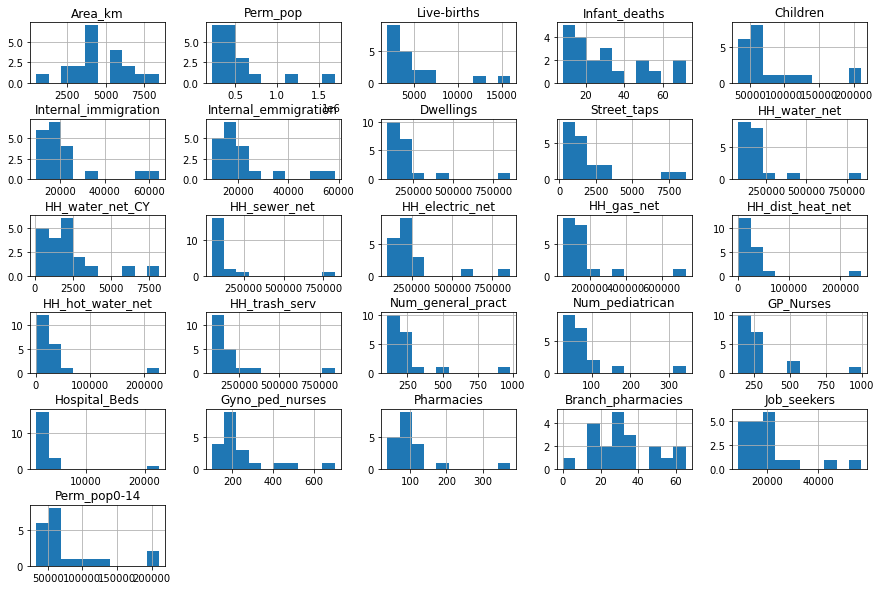

In [38]:
#Review a single year's distributions including all counties
HCD_2005=HCD_2[HCD_2["Year"]=="2005"]
HCD_2005.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.60)

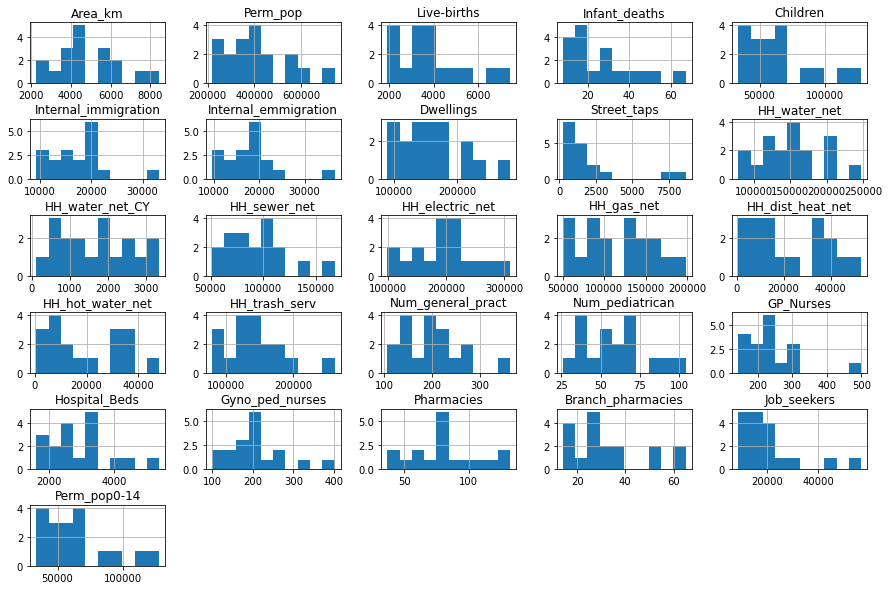

In [39]:
#Review a single year's distributions excluding the two largest counties
HCD_2005X=HCD_2[(HCD_2["Year"]=="2005") & (~HCD_2["County"].isin(["BUDAPEST","PEST"]))]
HCD_2005X.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.60)

## 02.6 Merge Files<a id='02.6_Merge_Files'></a>

In [40]:
#merge chickenpox data by county with county geographical data
#df5= (pd.merge(df2,df4,left_on="County", right_on="name_1", how='inner'))
#retrieve year from date information
#df5['Yearpart']= pd.to_datetime(df5['Date']).dt.year.apply(str)
#insert Year column to be used as a key with county
#df5.insert(loc=1, column='Year',value=df5['Yearpart'] )
#print(df5.head())
#print(df5.info())

### 02.6.1 Weekly Cases by County Merged with Statistics<a id='02.6.1_Weekly_Cases_by_County_Merged_with_Statistics'></a>

In [41]:
# Merge Case data by county (weekly data) with Census data by county(annualized)
df6= (pd.merge(df2,HCD_2.loc[:,'Year':'Job_seekers'],left_on=['Year','County'], right_on=['Year','County'] ,how='left'))

##### 02.6.1.1 Example<a id='02.6.1.1_Example'></a>

In [42]:
print(df6.head())

        Date  Year    County  Cases  Area_km   Perm_pop  Live-births  \
0 2005-01-03  2005  BUDAPEST    168    525.1  1690109.0      15911.0   
1 2005-01-10  2005  BUDAPEST    157    525.1  1690109.0      15911.0   
2 2005-01-17  2005  BUDAPEST     96    525.1  1690109.0      15911.0   
3 2005-01-24  2005  BUDAPEST    163    525.1  1690109.0      15911.0   
4 2005-01-31  2005  BUDAPEST    122    525.1  1690109.0      15911.0   

   Infant_deaths  Children  Internal_immigration  ...  HH_hot_water_net  \
0           72.0  210704.0               53922.0  ...          227742.0   
1           72.0  210704.0               53922.0  ...          227742.0   
2           72.0  210704.0               53922.0  ...          227742.0   
3           72.0  210704.0               53922.0  ...          227742.0   
4           72.0  210704.0               53922.0  ...          227742.0   

   HH_trash_serv  Num_general_pract  Num_pediatrican  GP_Nurses  \
0       843733.0              979.0            34

##### 02.6.2.1 Structure<a id='02.6.2.1_Structure'></a>

In [43]:
print(df6.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10440 entries, 0 to 10439
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  10440 non-null  datetime64[ns]
 1   Year                  10440 non-null  object        
 2   County                10440 non-null  object        
 3   Cases                 10440 non-null  int64         
 4   Area_km               10440 non-null  float64       
 5   Perm_pop              10440 non-null  float64       
 6   Live-births           10440 non-null  float64       
 7   Infant_deaths         10440 non-null  float64       
 8   Children              10440 non-null  float64       
 9   Internal_immigration  10440 non-null  float64       
 10  Internal_emmigration  10440 non-null  float64       
 11  Dwellings             10440 non-null  float64       
 12  Street_taps           10440 non-null  float64       
 13  HH_water_net    

### 02.6.2 Annual Cases by County Merged with Statistics<a id='02.6.2_Annual_Cases_by_County_Merged_with_Statistics'></a>

In [44]:
#Group df2 dataframe by year and county for sum of cases
dfann=df2.loc[:,'Year':'Cases'].groupby(['Year','County']).agg(np.sum)

In [45]:
print(dfann)

               Cases
Year County         
2005 BACS       2766
     BARANYA    2051
     BEKES      3544
     BORSOD     4027
     BUDAPEST   4562
...              ...
2014 SZABOLCS    944
     TOLNA       607
     VAS         855
     VESZPREM   1534
     ZALA        889

[200 rows x 1 columns]


In [46]:
# Merge Case data by county (annual data) with Census data by county(annualized)
df7= (pd.merge(dfann,HCD_2.loc[:,'Year':'Job_seekers'],left_on=['Year','County'], right_on=['Year','County'] ,how='left'))

##### 02.6.2.1 Example<a id='02.6.2.1_Example'></a>

In [47]:
print(df7.head())

   Year    County  Cases  Area_km   Perm_pop  Live-births  Infant_deaths  \
0  2005      BACS   2766  8445.15   547459.0       4895.0           47.0   
1  2005   BARANYA   2051  4429.47   404184.0       3672.0           18.0   
2  2005     BEKES   3544  5629.69   391579.0       3287.0           27.0   
3  2005    BORSOD   4027  7247.28   743541.0       7442.0           67.0   
4  2005  BUDAPEST   4562   525.10  1690109.0      15911.0           72.0   

   Children  Internal_immigration  Internal_emmigration  ...  \
0   84717.0               20899.0               21033.0  ...   
1   60107.0               19753.0               19888.0  ...   
2   57958.0               14623.0               15706.0  ...   
3  127859.0               33204.0               36587.0  ...   
4  210704.0               53922.0               58372.0  ...   

   HH_hot_water_net  HH_trash_serv  Num_general_pract  Num_pediatrican  \
0           14750.0       182004.0              261.0             85.0   
1         

##### 02.6.2.2 Structure<a id='02.6.2.2_Structure'></a>

In [48]:
print(df7.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  200 non-null    object 
 1   County                200 non-null    object 
 2   Cases                 200 non-null    int64  
 3   Area_km               200 non-null    float64
 4   Perm_pop              200 non-null    float64
 5   Live-births           200 non-null    float64
 6   Infant_deaths         200 non-null    float64
 7   Children              200 non-null    float64
 8   Internal_immigration  200 non-null    float64
 9   Internal_emmigration  200 non-null    float64
 10  Dwellings             200 non-null    float64
 11  Street_taps           200 non-null    float64
 12  HH_water_net          200 non-null    float64
 13  HH_water_net_CY       200 non-null    float64
 14  HH_sewer_net          200 non-null    float64
 15  HH_electric_net       2

### 02.6.3 Adjacent Counties Merged with Data<a id='02.6.3_Adjacent_Counties_Counties_Merged_with_Data'></a>

In [49]:
#merge weekly chickenpox data by county with county geographical data
df6_final= (pd.merge(df6,df4,left_on="County", right_on="name_1", how='inner'))

In [50]:
#merge annual chickenpox data by county with county geographical data
df7_final= (pd.merge(df7,df4,left_on="County", right_on="name_1", how='inner'))

##### 02.6.3.1 Example<a id='02.6.3.1_Example'></a>

In [51]:
#Example for Weekly data with adjacent county data added
df6_final.head()

,Date,Year,County,Cases,Area_km,Perm_pop,Live-births,Infant_deaths,Children,Internal_immigration,...,JASZ_adjacent,KOMAROM_adjacent,NOGRAD_adjacent,PEST_adjacent,SOMOGY_adjacent,SZABOLCS_adjacent,TOLNA_adjacent,VAS_adjacent,VESZPREM_adjacent,ZALA_adjacent
0,2005-01-03,2005,BUDAPEST,168,525.1,1690109.0,15911.0,72.0,210704.0,53922.0,...,0,0,0,1,0,0,0,0,0,0
1,2005-01-10,2005,BUDAPEST,157,525.1,1690109.0,15911.0,72.0,210704.0,53922.0,...,0,0,0,1,0,0,0,0,0,0
2,2005-01-17,2005,BUDAPEST,96,525.1,1690109.0,15911.0,72.0,210704.0,53922.0,...,0,0,0,1,0,0,0,0,0,0
3,2005-01-24,2005,BUDAPEST,163,525.1,1690109.0,15911.0,72.0,210704.0,53922.0,...,0,0,0,1,0,0,0,0,0,0
4,2005-01-31,2005,BUDAPEST,122,525.1,1690109.0,15911.0,72.0,210704.0,53922.0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
#Example for annual data with adjacent county data added
df7_final.head()

,Year,County,Cases,Area_km,Perm_pop,Live-births,Infant_deaths,Children,Internal_immigration,Internal_emmigration,...,JASZ_adjacent,KOMAROM_adjacent,NOGRAD_adjacent,PEST_adjacent,SOMOGY_adjacent,SZABOLCS_adjacent,TOLNA_adjacent,VAS_adjacent,VESZPREM_adjacent,ZALA_adjacent
0,2005,BACS,2766,8445.15,547459.0,4895.0,47.0,84717.0,20899.0,21033.0,...,1,0,0,1,0,0,1,0,0,0
1,2006,BACS,1969,8445.33,545618.0,5141.0,27.0,82800.0,23404.0,24004.0,...,1,0,0,1,0,0,1,0,0,0
2,2007,BACS,2197,8444.72,544429.0,4951.0,28.0,81009.0,23615.0,24959.0,...,1,0,0,1,0,0,1,0,0,0
3,2008,BACS,1711,8444.83,542876.0,5041.0,39.0,79777.0,18218.0,19622.0,...,1,0,0,1,0,0,1,0,0,0
4,2009,BACS,1607,8444.83,541005.0,4905.0,36.0,78289.0,17367.0,18773.0,...,1,0,0,1,0,0,1,0,0,0


##### 02.6.3.2 Structure<a id='02.6.3.2_Structure'></a>

In [53]:
#structure for Weekly data with adjacent county data added
df6_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10440 entries, 0 to 10439
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  10440 non-null  datetime64[ns]
 1   Year                  10440 non-null  object        
 2   County                10440 non-null  object        
 3   Cases                 10440 non-null  int64         
 4   Area_km               10440 non-null  float64       
 5   Perm_pop              10440 non-null  float64       
 6   Live-births           10440 non-null  float64       
 7   Infant_deaths         10440 non-null  float64       
 8   Children              10440 non-null  float64       
 9   Internal_immigration  10440 non-null  float64       
 10  Internal_emmigration  10440 non-null  float64       
 11  Dwellings             10440 non-null  float64       
 12  Street_taps           10440 non-null  float64       
 13  HH_water_net    

In [54]:
#Structure for annual data with adjacent county data added
df7_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  200 non-null    object 
 1   County                200 non-null    object 
 2   Cases                 200 non-null    int64  
 3   Area_km               200 non-null    float64
 4   Perm_pop              200 non-null    float64
 5   Live-births           200 non-null    float64
 6   Infant_deaths         200 non-null    float64
 7   Children              200 non-null    float64
 8   Internal_immigration  200 non-null    float64
 9   Internal_emmigration  200 non-null    float64
 10  Dwellings             200 non-null    float64
 11  Street_taps           200 non-null    float64
 12  HH_water_net          200 non-null    float64
 13  HH_water_net_CY       200 non-null    float64
 14  HH_sewer_net          200 non-null    float64
 15  HH_electric_net       2

## 02.7 Save Files<a id='02.7_Save_Files'></a>

In [55]:
# save weekly data to csv file in data folder

File_Location='data/interim/weekly_chichenpox_data.csv'
full_path = Project_Local+File_Location
df6_final.to_csv(full_path)

In [56]:
# save annualized data to csv file in data folder
File_Location = 'data/interim/annual_chichenpox_data.csv'
full_path= Project_Local+File_Location
df7_final.to_csv(full_path)

## 02.8 Summary<a id='02.8_Summary'></a>

After reviewing the data frequency between the chickenpox file (weekly) and the statistics file(annual), the chickenpox information has been merged with the chickenpox information presented in both a weekly file and an annualized file.  Will utilize tools in the EDA process to determine if one file is superior to the other.

Also noticed that two of the counties (Budapest and Pest) are outliers compared to the other counties interms of population and other features.

Will use the number of cases as the target, and the remaining as features.